# Outliers Assignment - Arif Aygun

In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle. The data gives detailed state-level information on several facets of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above.

Don't forget to apply the most suitable missing-value-filling techniques from the previous checkpoint to the data. Provide the answers to the following only after you've addressed missing values!

To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks:

1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.

3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

6. If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?


#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

- Reading dataset

In [3]:
df_states= pd.read_csv('states_all.csv')

In [4]:
df_states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


- Checking basic informations of dataframe

In [5]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

- Pandas dataframe.interpolate() function will be used to fill NA values in the dataframe.

In [6]:
df_filled = df_states.interpolate(method ='linear', limit_direction ='both')

- Identify Missing Values of dataframe Pandas isnull() function.

In [7]:
df_filled.isnull().sum()*100/df_filled.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

#### 1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10,5)

- Plotting Histograms

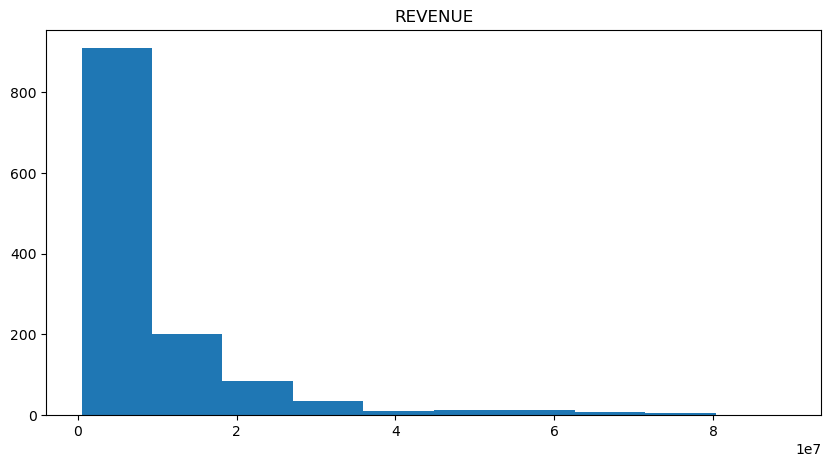

In [9]:

plt.hist(df_states['TOTAL_REVENUE'])
plt.title('REVENUE')
plt.show()

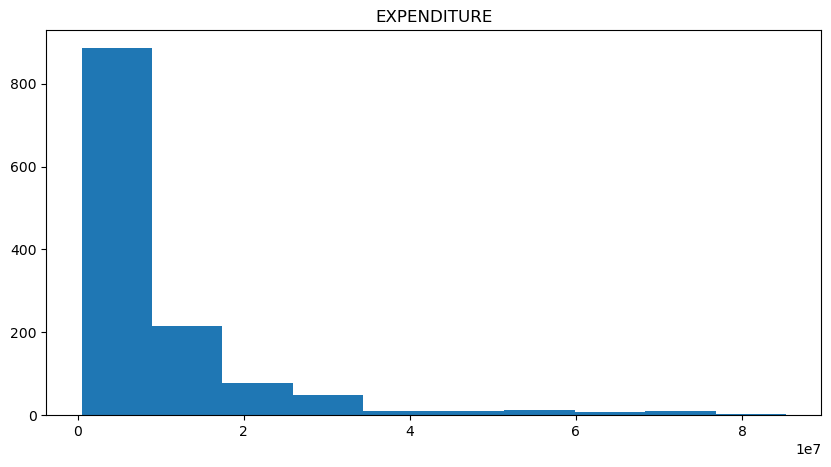

In [10]:
plt.hist(df_states['TOTAL_EXPENDITURE'])
plt.title('EXPENDITURE')
plt.show()

- Plotting Box and Whisker Plots

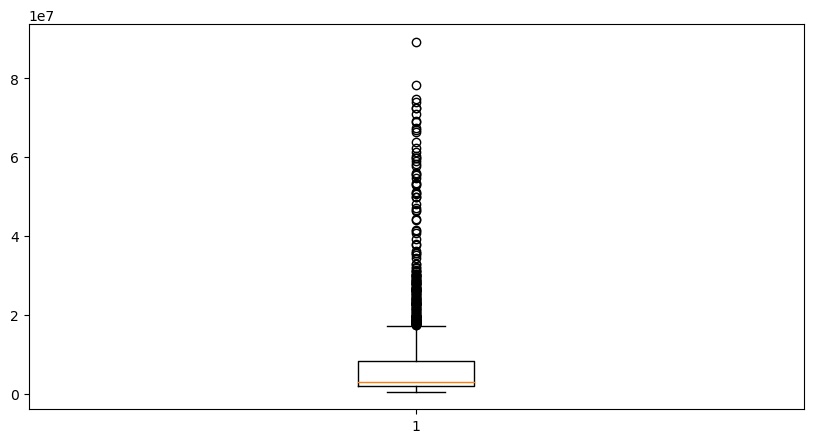

In [11]:
plt.boxplot(df_filled['TOTAL_REVENUE'])
plt.show()

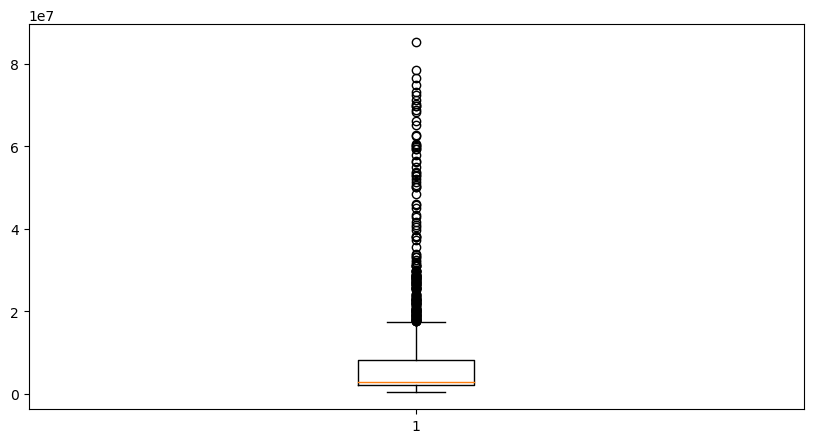

In [12]:
plt.boxplot(df_filled['TOTAL_EXPENDITURE'])
plt.show()

- Appling Statistical Tools in Detecting the Outliers

In [15]:
from scipy.stats import zscore

- The Outliers of TOTAL_REVENUE

In [16]:
zscore_TR = zscore(df_filled['TOTAL_REVENUE'])

In [30]:
for i in range(1,5):
    print('The score threshold is: {}'.format(i))
    print('The indices of the outliers:')
    print(np.where(zscore_TR>i))
    print('Number of outliers is : {}'.format(len(np.where(zscore_TR>i)[0])))
    print('_'*75)

The score threshold is: 1
The indices of the outliers:
(array([   4,   32,   55,   83,   94,  106,  134,  145,  157,  185,  196,
        208,  236,  247,  259,  287,  298,  310,  338,  349,  361,  389,
        400,  412,  440,  451,  463,  468,  472,  491,  502,  514,  519,
        523,  532,  540,  542,  548,  553,  565,  570,  574,  583,  591,
        593,  596,  599,  604,  616,  621,  625,  634,  642,  644,  647,
        650,  655,  667,  672,  676,  685,  693,  695,  698,  701,  706,
        718,  723,  727,  736,  744,  746,  749,  752,  757,  769,  774,
        778,  787,  795,  797,  800,  803,  808,  820,  825,  826,  829,
        838,  846,  848,  851,  854,  859,  871,  876,  877,  880,  889,
        897,  899,  902,  905,  910,  922,  927,  931,  940,  948,  950,
        953,  956,  961,  973,  978,  979,  982,  991,  999, 1001, 1004,
       1007, 1012, 1024, 1029, 1033, 1042, 1050, 1052, 1055, 1058, 1063,
       1075, 1080, 1084, 1093, 1101, 1103, 1106, 1109, 1114, 1126, 1

- The Outliers of TOTAL_EXPENDITURE

In [32]:
zscore_TE = zscore(df_filled['TOTAL_EXPENDITURE'])

In [34]:
for i in range(1,5):
    print('The score threshold is: {}'.format(i))
    print('The indices of the outliers:')
    print(np.where(zscore_TE>i))
    print('Number of Outliers is: {}'.format(len(np.where(zscore_TE>i)[0])))
    print('-'*75)

The score threshold is: 1
The indices of the outliers:
(array([   4,   32,   55,   83,   94,  106,  134,  145,  157,  185,  196,
        208,  236,  247,  259,  287,  298,  310,  338,  349,  361,  389,
        400,  412,  440,  451,  463,  468,  472,  491,  497,  502,  514,
        519,  523,  532,  542,  548,  553,  565,  570,  574,  583,  591,
        593,  596,  599,  604,  616,  621,  625,  634,  642,  644,  647,
        650,  655,  667,  672,  676,  685,  693,  695,  698,  701,  706,
        718,  723,  727,  736,  744,  746,  749,  752,  757,  769,  774,
        778,  787,  795,  797,  800,  803,  808,  820,  825,  826,  829,
        838,  846,  848,  851,  854,  859,  871,  876,  877,  880,  889,
        897,  899,  902,  905,  910,  922,  927,  931,  940,  948,  950,
        953,  956,  961,  973,  978,  982,  991,  999, 1001, 1004, 1007,
       1012, 1024, 1029, 1033, 1050, 1052, 1055, 1058, 1063, 1075, 1080,
       1084, 1101, 1103, 1106, 1109, 1114, 1126, 1131, 1135, 1152, 1

#### 2.If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there are no outlier values after you handled them.